<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек,-чтение-данных" data-toc-modified-id="Подключение-библиотек,-чтение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек, чтение данных</a></span></li><li><span><a href="#Рассмотрим-датасет-на-наличие-дисбаланса-классов." data-toc-modified-id="Рассмотрим-датасет-на-наличие-дисбаланса-классов.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Рассмотрим датасет на наличие дисбаланса классов.</a></span></li><li><span><a href="#Препроцессинг-(подготовка-текстов)" data-toc-modified-id="Препроцессинг-(подготовка-текстов)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Препроцессинг (подготовка текстов)</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разобьем-данные-на-выборки-train-и-test" data-toc-modified-id="Разобьем-данные-на-выборки-train-и-test-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разобьем данные на выборки train и test</a></span></li><li><span><a href="#Векторизация-текстов" data-toc-modified-id="Векторизация-текстов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Векторизация текстов</a></span></li><li><span><a href="#Dummy" data-toc-modified-id="Dummy-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dummy</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#NearestCentroid" data-toc-modified-id="NearestCentroid-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>NearestCentroid</a></span></li><li><span><a href="#Perceptron" data-toc-modified-id="Perceptron-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Perceptron</a></span></li><li><span><a href="#SGDClassifier" data-toc-modified-id="SGDClassifier-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>SGDClassifier</a></span></li><li><span><a href="#ComplementNB" data-toc-modified-id="ComplementNB-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>ComplementNB</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>LGBMClassifier</a></span><ul class="toc-item"><li><span><a href="#Подбираем-гиперпараметры-модели-LGBMClassifier" data-toc-modified-id="Подбираем-гиперпараметры-модели-LGBMClassifier-2.9.1"><span class="toc-item-num">2.9.1&nbsp;&nbsp;</span>Подбираем гиперпараметры модели LGBMClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-5"><span class="toc-item-num">5&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Подключение библиотек, чтение данных

Подключаем необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd

import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import f1_score

import time

import lightgbm as lgb

In [2]:
%%capture
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
# читаем данные с сервера яндекса
#df_toxic = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

local = False
if local:
    df = pd.read_csv('./datasets/toxic_comments.csv')
else:
    url = "https://drive.google.com/file/d/1Thqt_--s4OWEvd1K6ZKm0Bo4t8oYmqDY/view?usp=sharing"
    path = 'https://drive.google.com/uc?export=download&id='+ url.split('/')[-2]
    df_toxic = pd.read_csv(path)

Посмотрим, с чем мы имеем дело.

In [6]:
df_toxic.sample(10, random_state=12345)

,text,toxic
146790,Ahh shut the fuck up you douchebag sand nigger...,1
2941,"""\n\nREPLY: There is no such thing as Texas Co...",0
115087,"Reply\nHey, you could at least mention Jasenov...",0
48830,"Thats fine, there is no deadline ) chi?",0
136034,"""\n\nDYK nomination of Mustarabim\n Hello! You...",0
121992,"""\n\nSockpuppetry case\n \nYou have been accus...",0
37282,"Judging by what I've just read in an article, ...",0
64488,Todd and Copper\nIn the first film they were l...,0
16992,"""\n\n \nYou have been blocked from editing for...",0
138230,| decline=Can't find evidence of block either ...,0


In [5]:
# размеры
df_toxic.shape

(159571, 2)

Проверим датасет на nan.

In [6]:
df_toxic.isna().sum()

text     0
toxic    0
dtype: int64

Вывод: Пропусков - нет. И это - хорошо.

### Рассмотрим датасет на наличие дисбаланса классов.


''

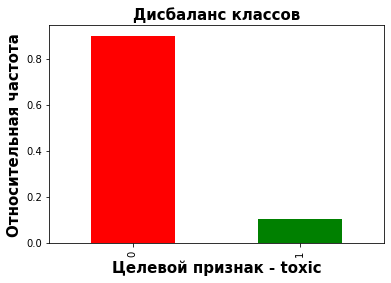

In [7]:
my_colors = list('rgbkymc')
class_frequency = df_toxic['toxic'].value_counts(normalize=True)
class_frequency.plot(kind='bar', color=my_colors)
plt.xlabel('Целевой признак - toxic',fontsize=15, weight = 'bold')
plt.ylabel('Относительная частота',fontsize=15, weight = 'bold')
plt.title("Дисбаланс классов",fontsize=15, weight = 'bold')
;

In [8]:
print(class_frequency)

0    0.898321
1    0.101679
Name: toxic, dtype: float64


**Вывод: Мы имеем явно выраженный дисбаланс классов в отношении 0 класса к 1 классу, как 9:1. Это необходимо будет учесть, при построении моделей обучения.**

### Препроцессинг (подготовка текстов)

Подготовим функцию для предобработки текстов. Приведем тексты к нижнему регистру, выбросим знаки препинания и стоп-слова. Разобъем тексты на токены.

In [9]:
def preprocessing_text(text, Stemming=True, Lemmatization=False):
    PUNCT_TO_REMOVE = string.punctuation
    STOPWORDS = set(stopwords.words('english'))
    
    #Приводим текст к нижнему регистру
    text = text.lower()
    
    #Удаляем символы пунктуации, они нам не нужны
    text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    
    #Удаление стопслов
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    #Удаление всех символов кроме букв
    text =  ' '.join(re.sub(r'[^a-zA-Z]', ' ', text).split())
    
    #Stemming - приводим слова к базовой форме
    if Stemming:
        try:
            stemmer = PorterStemmer()
            text = " ".join([stemmer.stem(word) for word in text.split()])
        except:
            print(text)
   
    #Lemmatization - работает катастрофически медленнее, заблокировано до лучших времен
    if Lemmatization:
        lemmatizer = WordNetLemmatizer()
        wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
        pos_tagged_text = nltk.pos_tag(text.split())    
        text = " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) \
                         for word, pos in pos_tagged_text])
    
    return text

Оценим производительность функции на батче из 1000 строк.

Смотрим на Stemming.

In [10]:
%%time
df_sample_stemming = df_toxic.sample(1000, random_state=42).copy()
start_time = time.time()
df_sample_stemming['clean_text'] = df_sample_stemming['text'].apply(lambda x: preprocessing_text(x,True,False))
stop_time = time.time()
runtime = stop_time - start_time

Wall time: 1.38 s


In [11]:
print("Ожидаемое время выполнения stemming на полном датасете {:.1f} мин.".format(runtime * 160 / 60))

Ожидаемое время выполнения stemming на полном датасете 3.7 мин.


Справка: Вычисления проводились на ноутбуке со следующими характеристиками Intel(R) Core(TM) i5-4300U CPU @ 1.90GHz   2.49 GHz, 16,0 ГБ, SSD.

In [12]:
# посмотрим на результат Stemming
df_sample_stemming.head(10)

,text,toxic,clean_text
119105,"Geez, are you forgetful! We've already discus...",0,geez forget weve alreadi discuss marx anarchis...
131631,Carioca RFA \n\nThanks for your support on my ...,0,carioca rfa thank support request adminship fi...
125326,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,birthday worri enjoy ur daytalk
111256,Pseudoscience category? \n\nI'm assuming that ...,0,pseudosci categori im assum articl pseudosci c...
83590,"(and if such phrase exists, it would be provid...",0,phrase exist would provid search engin even me...
37546,", 9 October 2007 (UTC)\n\nP.s, the delta funct...",0,octob utc ps delta function use exampl kroneck...
98371,"]]- 10 September 1910, [[[Couvet]] )",0,septemb couvet
67118,Negro league baseball task-force talk].,0,negro leagu basebal taskforc talk
129625,List of My Three Sons episodes \n\nI saw you r...,0,list three son episod saw redirect two season ...
48941,Quoting Loremaster: In order to make sure you ...,0,quot loremast order make sure understand


Смотрим на Lemmatization.

In [13]:
%%time
df_sample_lemmatization = df_toxic.sample(1000, random_state=42).copy()
start_time = time.time()
df_sample_lemmatization['clean_text'] = df_sample_lemmatization['text'].apply(lambda x: preprocessing_text(x,False,True))
stop_time = time.time()
runtime = stop_time - start_time

Wall time: 5.93 s


In [14]:
print("Ожидаемое время выполнения lemmatization на полном датасете {:.1f} мин.".format(runtime * 160 / 60))

Ожидаемое время выполнения lemmatization на полном датасете 15.8 мин.


In [15]:
# посмотрим на результат Lemmatization
df_sample_lemmatization.head(10)

,text,toxic,clean_text
119105,"Geez, are you forgetful! We've already discus...",0,geez forgetful weve already discuss marx anarc...
131631,Carioca RFA \n\nThanks for your support on my ...,0,carioca rfa thanks support request adminship f...
125326,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,birthday worry enjoy ur daytalke
111256,Pseudoscience category? \n\nI'm assuming that ...,0,pseudoscience category im assume article pseud...
83590,"(and if such phrase exists, it would be provid...",0,phrase exists would provide search engine even...
37546,", 9 October 2007 (UTC)\n\nP.s, the delta funct...",0,october utc p delta function use example krone...
98371,"]]- 10 September 1910, [[[Couvet]] )",0,september couvet
67118,Negro league baseball task-force talk].,0,negro league baseball taskforce talk
129625,List of My Three Sons episodes \n\nI saw you r...,0,list three son episodes saw redirect two seaso...
48941,Quoting Loremaster: In order to make sure you ...,0,quote loremaster order make sure understand


Для обработки текстов всего датасета будем использовать Stemming, как более быстрый алгоритм.

Преобразовывать текст будем батчами по 1000 строк, копируя промежуточный результат в список из датафреймов. Затем соберем весь датафрейм в один. Это сделано, всвязи с тем, что в диапазоне индексов [110000 : 119999] исходного датафрейма постоянно происходит падения ядра. Поэтому 115 батч был пропущен.

In [17]:
# список для хранения промежуточных батчей из датафреймов
list_frame = []

In [18]:
# размер батча
batchsize = 1000

df_len = df_toxic.shape[0]

In [19]:
%%time
for i in tqdm(range((df_len//batchsize)+1)):
    
    # батч 115 пропущен из-за падения ядра
    if batchsize == 1000 and i == 115: 
        continue
         
    left = batchsize*i
    right = batchsize*(i+1)-1
    if right > df_len: 
        right = df_len
        
    df_batch = df_toxic[left:right].copy()
    df_batch['clean_text'] = df_batch['text'].apply(lambda x: preprocessing_text(x))
    
    list_frame.append(df_batch)

  0%|          | 0/160 [00:00<?, ?it/s]

Wall time: 3min 47s


In [20]:
# собираем "чистый" датафрейм
df_clean = pd.concat(list_frame)

In [21]:
# контроль дисбаланса классов
df_clean['toxic'].mean()

0.1017593253078977

In [22]:
df_clean.shape

(158413, 3)

Будем считать, что датафрейм не пострадал, из-за выброшенной 1000 строк (всего было 160 000).

In [23]:
df_clean.reset_index()
df_clean.head(5)

,text,toxic,clean_text
0,Explanation\nWhy the edits made under my usern...,0,explan edit made usernam hardcor metallica fan...
1,D'aww! He matches this background colour I'm s...,0,daww match background colour im seemingli stuc...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man im realli tri edit war guy constantli ...
3,"""\nMore\nI can't make any real suggestions on ...",0,cant make real suggest improv wonder section s...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chanc rememb page that


In [29]:
# выброшено из датасета
(1000/df_clean.shape[0])
print("Всего удалено {:%} строк из датасета.".format((1000/df_clean.shape[0])))

Всего удалено 0.631261% строк из датасета


Сбросим отредактированный результат на диск. При падении ядра, можно будет восстановиться без потери времени на повторый препроцессинг.

In [30]:
try:
    df_clean.to_csv('df_clean.csv')
except:
    print("Не удалось сохранить очищенный датасет!")

**Вывод:** В исходном датасете был обработан текст с использованием алгоритма Stemming. Часть датасета (0.6% ) пришлось выбросить, так как на этой части происходило падение ядра. Баланс классов при этом не нарушен. Результат преобразования сохранен на диск в файл df_clean.csv.

## Обучение

### Разобьем данные на выборки train и test

In [31]:
X = df_clean.drop(['toxic'], axis=1)
y = df_clean['toxic'] 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Проверим результат разбиения на дисбаланс классов.

In [33]:
y_train.mean()

0.10181488203266788

In [34]:
y_test.mean()

0.10153710191585393

Разбиение произошло без нарушений дисбаланса классов.

### Векторизация текстов

In [35]:
# получение корпуса в кодировке Юникод
corpus_train = X_train['clean_text'].values.astype('U')
corpus_test = X_test['clean_text'].values.astype('U')

# Получение TF-IDF для корпуса текста
tf_idf = TfidfVectorizer() 

# fit_transform для train
tf_idf_train = tf_idf.fit_transform(corpus_train) 

# transform для test
tf_idf_test = tf_idf.transform(corpus_test)

Для замеров производительности выполнения создадим класс.

In [36]:
class timeit():
    import time
    def __init__(self):
        self.runtime = 0
    def __enter__(self):
        self.tic = self.time.time()
    def __exit__(self, *args, **kwargs):
        self.runtime = self.time.time() - self.tic

# создаем экземпляр класса
myclock = timeit()

Подготовим функцию, для тренировки различных моделей.

In [37]:
# список для результатов исследования различных моделей
result_list=[]

In [38]:
# функция тренирует модель и предсказывает результат.
# с замером времени
def model_fit_predict(model, modelname=''):

    with myclock:
        model.fit(tf_idf_train, y_train)
    trainingtime = myclock.runtime

    with myclock:
        y_predict = model.predict(tf_idf_test)
    predicttime = myclock.runtime
    
    if modelname == '':
        modelname = str(model)
        modelname = modelname.replace("(", '')
        modelname = modelname.replace(")", '')
    
    #RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
    f1 = f1_score(y_test, y_predict)
    print("{} f1 = {:.2f}".format(modelname, f1))
    
    result_list.append({ 'model': modelname,'training_time':trainingtime, 'predict_time':predicttime, 'f1':f1})


### Dummy

За точку отсчета примем результаты dummy модели

In [39]:
%%time
dummy_clf = DummyClassifier(strategy="most_frequent")
model_fit_predict(dummy_clf)

DummyClassifierstrategy='most_frequent' f1 = 0.00
Wall time: 27 ms


### LogisticRegression

In [40]:
%%time
model_lg = LogisticRegression(random_state = 42, class_weight = 'balanced')

param_dist = {"penalty": ['l2'],
               "solver": ['sag','saga','liblinear'] 
              }
grid_search = GridSearchCV(model_lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="f1", verbose=5)
grid_search.fit(tf_idf_train,y_train)

# лучший оценщик
grid_search.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Wall time: 55.4 s


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(class_weight='balanced', random_state=42, solver='saga')

In [41]:
%%time
model_lg = LogisticRegression(random_state = 42, class_weight = 'balanced', solver='saga')
model_fit_predict(model_lg, 'LogisticRegression')

LogisticRegression f1 = 0.76
Wall time: 17.2 s


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### NearestCentroid

The NearestCentroid classifier is a simple algorithm that represents each class by the centroid of its members

In [42]:
%%time
model_nc = NearestCentroid()
model_fit_predict(model_nc)

NearestCentroid f1 = 0.69
Wall time: 121 ms


### Perceptron

The Perceptron is another simple classification algorithm suitable for large scale learning. By default:

In [44]:
%%time
model_p =  Perceptron(random_state= 42, class_weight = 'balanced')
model_fit_predict(model_p, 'Perceptron')

Perceptron f1 = 0.70
Wall time: 998 ms


### SGDClassifier

Linear classifiers (SVM, logistic regression, etc.) with SGD training.

In [45]:
model_sgd = SGDClassifier(random_state = 42, class_weight = 'balanced')

param_dist = {"penalty": ['l2','elasticnet','l1'],
              "max_iter": [1000, 2000],
               "shuffle": [True,False] 
              }
grid_search = GridSearchCV(model_sgd, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="f1", verbose=5)
grid_search.fit(tf_idf_train,y_train)

# лучший оценщик
grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'max_iter': 1000, 'penalty': 'elasticnet', 'shuffle': False}

In [46]:
%%time
model_sgd = SGDClassifier(class_weight = 'balanced', penalty = 'elasticnet', max_iter = 1000, shuffle=False)
model_fit_predict(model_sgd, 'SGDClassifier')

SGDClassifier f1 = 0.75
Wall time: 712 ms


### ComplementNB

The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.

In [47]:
%%time
clf = ComplementNB()
model_fit_predict(clf, 'ComplementNB')

ComplementNB f1 = 0.60
Wall time: 113 ms


Вопреки ожиданиям, модель не подошла для несбаланисованных классов.

### LGBMClassifier

#### Подбираем гиперпараметры модели LGBMClassifier

- boosting_type (string, optional (default='gbdt')) – ‘gbdt’, traditional Gradient Boosting Decision Tree. ‘dart’, Dropouts - meet Multiple Additive Regression Trees. ‘goss’, Gradient-based One-Side Sampling. ‘rf’, Random Forest.
- max_depth (int, optional (default=-1)) – Maximum tree depth for base learners, <=0 means no limit.
- n_estimators (int, optional (default=100)) – Number of boosted trees to fit.
- learning_rate (float, optional (default=0.1)) – Boosting learning rate.

In [48]:
%%time
lg = lgb.LGBMClassifier(silent=False, class_weight = 'balanced')
param_dist = {"max_depth": [50],
               "learning_rate" : [0.5],
               "boosting_type": ['gbdt','goss'],
               "n_estimators": [200, 500]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="f1", verbose=5)
grid_search.fit(tf_idf_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 12903, number of negative: 113827
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 4.748123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 520626
[LightGBM] [Info] Number of data points in the train set: 126730, number of used features: 8835
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Wall time: 18min 8s


{'boosting_type': 'gbdt',
 'learning_rate': 0.5,
 'max_depth': 50,
 'n_estimators': 500}

In [50]:
%%time
model_lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', class_weight = 'balanced', n_estimators=500, \
                                learning_rate=0.5, max_depth=50)
model_fit_predict(model_lgbm, 'LGBMClassifier')

LGBMClassifier f1 = 0.77
Wall time: 1min 58s


In [51]:
df_result = pd.DataFrame(result_list)
df_result.sort_values(by = 'f1', ascending = False)

,model,training_time,predict_time,f1
6,LGBMClassifier,115.268021,2.813392,0.774858
1,LogisticRegression,17.162919,0.004997,0.759608
4,SGDClassifier,0.693623,0.003998,0.748842
3,Perceptron,0.981440,0.005001,0.701860
2,NearestCentroid,0.095965,0.014989,0.693864
5,ComplementNB,0.089948,0.013991,0.598563
0,DummyClassifierstrategy='most_frequent',0.010014,0.000000,0.000000


## Выводы

Для построения модели классификации комментариев были выполнены следующие действия:

- загружен датасет с данными. 
- проведена операция по выделению токенов в исходных текстах. 
- были построены различные модели с учетом дисбаланса классов

Результаты исследований сведены в итоговою табличку.

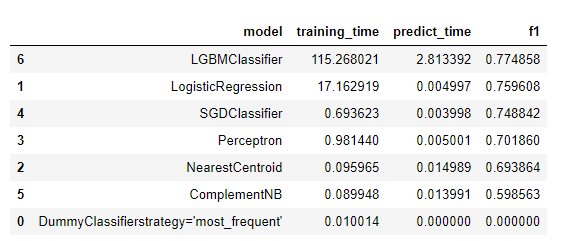


Для распознования токсичных комментариев по комбинации факторов скорость обучения vs результат и с учетомом пороговой метрики f1 = 0.75  - достаточно модели самой обычной логистической регрессии. 

Если же время обучения не является критическим фактором, то выбор следует остановить на LGBMClassifier.